# Credit Card Fraud Detection with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay,classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Loading and Sampling

In [2]:
df = pd.read_csv('creditcard.csv')
df = df.sample(frac = 0.1, random_state = 42).reset_index(drop = True)

In [3]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [4]:
print(X.shape)
print(y.shape)

(28481, 30)
(28481,)


### Model Training with Cross - Validation

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
lr = cross_val_score(LogisticRegression(), X_scaled, y, cv = skf, scoring = 'roc_auc')
svm = cross_val_score(SVC(), X_scaled, y,  cv = skf, scoring = 'roc_auc')
rfc = cross_val_score(RandomForestClassifier(), X_scaled, y,  cv = skf, scoring = 'roc_auc')
xgb = cross_val_score(XGBClassifier(), X_scaled, y, cv = skf, scoring = 'roc_auc')
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1234)

In [6]:
print(lr.mean())
print(svm.mean())
print(rfc.mean())
print(xgb.mean())

0.9507602133520896
0.9779024285407264
0.9437125608112067
0.9865056757126389


### Hyperparameter Tuning

In [7]:
clf = GridSearchCV(XGBClassifier(),{
    'n_estimators': [50,300],
    'learning_rate': [0.01, 0.3],
    'scale_pos_weight': [1, 5, 50, 100]
}, cv = skf, return_train_score = False)

clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_polic...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.3],
                         'n_estimators': [50, 300],
                         'scale_pos_weight': [1, 5, 50, 100]})

In [8]:
grid_result_df = pd.DataFrame(clf.cv_results_)
grid_result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094325,0.019001,0.003001,6.326360e-04,0.01,50,1,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.998464,0.998244,0.998244,0.998244,0.998464,0.998332,0.000107,14
1,0.110625,0.008311,0.002601,4.900183e-04,0.01,50,5,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.998464,0.998244,0.998244,0.998244,0.998464,0.998332,0.000107,14
2,0.101814,0.007192,0.002800,3.999474e-04,0.01,50,50,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.998464,0.998244,0.998244,0.998244,0.998464,0.998332,0.000107,14
3,0.098623,0.005572,0.002600,4.897456e-04,0.01,50,100,"{'learning_rate': 0.01, 'n_estimators': 50, 's...",0.999561,0.999122,0.999122,0.998903,0.998903,0.999122,0.000240,13
4,0.393193,0.028812,0.004001,3.989506e-07,0.01,300,1,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.999561,0.999122,0.999561,0.999122,0.999342,0.999342,0.000196,11
5,0.475712,0.039844,0.008402,7.311486e-03,0.01,300,5,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.999561,0.999122,0.999781,0.999122,0.999342,0.999386,0.000256,7
6,0.448403,0.024031,0.004302,8.707183e-04,0.01,300,50,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.999561,0.999342,0.999781,0.998903,0.999122,0.999342,0.000310,12
7,0.453030,0.028911,0.004201,4.000187e-04,0.01,300,100,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.999561,0.999342,0.999781,0.998903,0.999561,0.999429,0.000298,1
8,0.078218,0.003710,0.003000,2.780415e-07,0.30,50,1,"{'learning_rate': 0.3, 'n_estimators': 50, 'sc...",0.999561,0.999122,0.999781,0.999122,0.999342,0.999386,0.000256,7
9,0.083047,0.003164,0.002573,4.703390e-04,0.30,50,5,"{'learning_rate': 0.3, 'n_estimators': 50, 'sc...",0.999561,0.999122,0.999781,0.999122,0.999561,0.999429,0.000263,1


In [9]:
grid_result_df[['params','mean_test_score', 'rank_test_score']]
grid_result_df[grid_result_df['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.453030,0.028911,0.004201,0.00040,0.01,300,100,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.999561,0.999342,0.999781,0.998903,0.999561,0.999429,0.000298,1
9,0.083047,0.003164,0.002573,0.00047,0.30,50,5,"{'learning_rate': 0.3, 'n_estimators': 50, 'sc...",0.999561,0.999122,0.999781,0.999122,0.999561,0.999429,0.000263,1
15,0.257461,0.013236,0.003201,0.00040,0.30,300,100,"{'learning_rate': 0.3, 'n_estimators': 300, 's...",0.999561,0.999342,0.999561,0.999122,0.999561,0.999429,0.000176,1


### Finding Baseline

In [10]:
dummy = DummyClassifier(strategy = "most_frequent")
baseline_scores = cross_val_score(dummy, X_scaled, y, cv = 5)
print(baseline_scores.mean())

0.9983848930937433


### Training Chosen Model

In [11]:
model_xgb = XGBClassifier(n_estimators = 50, learning_rate = 0.3, scale_pos_weight = 5)

In [12]:
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

In [13]:
y_proba = model_xgb.predict_proba(X_test)[:, 1]

### Final Model Evaluation

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5689
           1       0.88      0.88      0.88         8

    accuracy                           1.00      5697
   macro avg       0.94      0.94      0.94      5697
weighted avg       1.00      1.00      1.00      5697



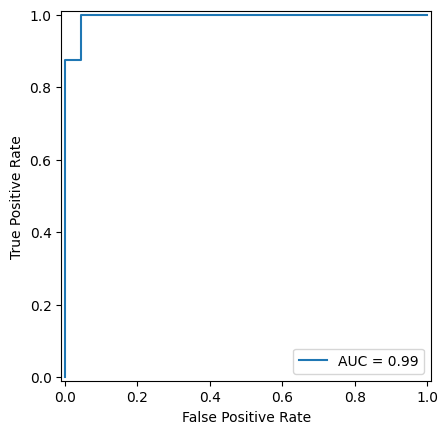

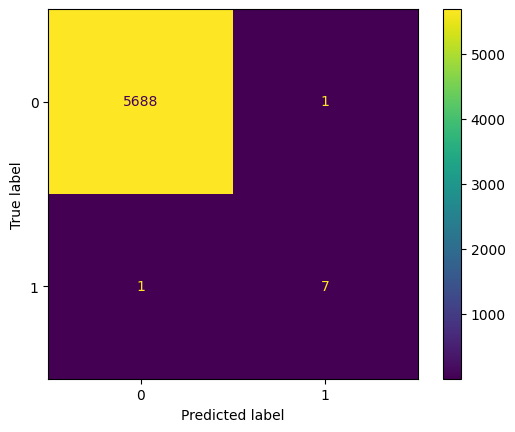

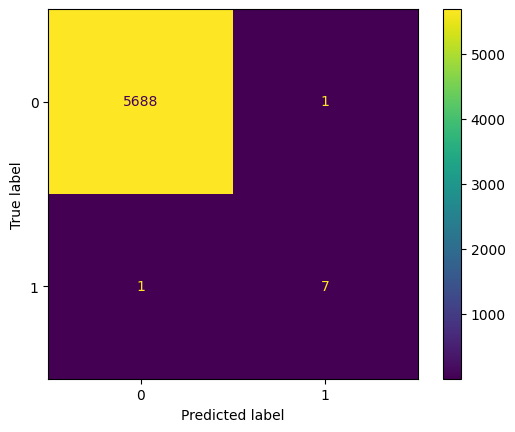

In [14]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred).plot()